In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import json
import pysrt
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from deep_translator import GoogleTranslator

In [55]:
DATA_DIR = '/Users/andishetavakkoli/Documents/notebook/github_project/machine-learning-projects-data/'

In [56]:
df = pd.read_csv(DATA_DIR + 'WordDifficulty.csv')

In [57]:
df.head()

,Word,Length,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_SD,Obs,I_Mean_Accuracy
0,a,1,10610626,16.18,798.92,-0.01,333.85,24.0,0.73
1,aah,3,222,5.40,816.43,0.21,186.03,21.0,0.62
2,Aaron,5,10806,9.29,736.06,-0.11,289.01,32.0,0.97
3,aback,5,387,5.96,796.27,0.11,171.61,15.0,0.45
4,abacus,6,513,6.24,964.40,0.65,489.00,15.0,0.47


<AxesSubplot:ylabel='Frequency'>

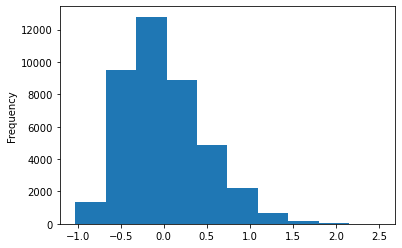

In [6]:
df['I_Zscore'].plot(kind='hist')

In [7]:
df[df['I_Zscore'] <= 0]

,Word,Length,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_SD,Obs,I_Mean_Accuracy
0,a,1,10610626,16.18,798.92,-0.01,333.85,24.0,0.73
2,Aaron,5,10806,9.29,736.06,-0.11,289.01,32.0,0.97
5,abandon,7,3761,8.23,695.72,-0.31,220.41,32.0,0.97
6,abandoned,9,5160,8.55,860.77,-0.09,447.56,31.0,0.91
7,abandoning,10,1005,6.91,740.55,-0.11,288.44,33.0,1.00
...,...,...,...,...,...,...,...,...,...
40474,zoom,4,4920,8.50,549.76,-0.76,97.65,33.0,1.00
40475,zooming,7,523,6.26,709.69,-0.29,283.11,29.0,0.88
40476,zooms,5,385,5.95,666.93,-0.48,232.11,30.0,0.94
40479,FALSE,5,0,0.00,718.06,-0.16,205.07,31.0,0.94


In [8]:
df[df['I_Zscore'] >= 2]

,Word,Length,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_SD,Obs,I_Mean_Accuracy
9844,diacritical,11,162,5.09,1458.75,2.51,421.41,4.0,0.17
11461,efflorescent,12,9,2.20,948.33,2.02,310.74,3.0,0.10
15201,ginner's,8,0,0.00,1589.50,2.12,258.09,2.0,0.06
18993,intradepartmental,17,0,0.00,1533.45,2.03,428.60,11.0,0.52
20641,limekiln,8,2,0.69,1587.50,2.07,645.59,2.0,0.06
21838,Mauritania,10,197,5.28,1286.33,2.28,290.34,3.0,0.10
26195,photocathode,12,14,2.64,1755.50,2.12,764.02,4.0,0.14
28159,pupated,7,2,0.69,1442.33,2.43,456.67,3.0,0.09
30982,sanest,6,35,3.56,1240.00,2.03,317.50,5.0,0.15
31699,semiquantitative,16,1,0.00,1405.83,2.18,346.91,6.0,0.23


In [58]:
df['I_Zscore'] = MinMaxScaler(feature_range=(1, 10)).fit_transform(df['I_Zscore'].values.reshape(-1, 1))

<AxesSubplot:ylabel='Frequency'>

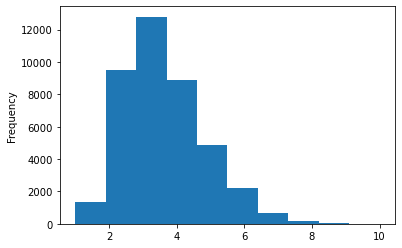

In [59]:
df['I_Zscore'].plot(kind='hist')

In [60]:
df_new = df[['Word' , 'I_Zscore']]

In [61]:
words = df['Word'].str.lower().to_list()
zscore = df['I_Zscore'].to_list()

In [62]:
dict_ = {}
for w, z in zip(words, zscore):
    dict_[w] = z
    
dict_

{'a': 3.593220338983051,
 'aah': 4.152542372881356,
 'aaron': 3.3389830508474576,
 'aback': 3.898305084745763,
 'abacus': 5.271186440677966,
 'abandon': 2.830508474576271,
 'abandoned': 3.3898305084745766,
 'abandoning': 3.3389830508474576,
 'abandonment': 3.6186440677966103,
 'abase': 3.694915254237288,
 'abasement': 5.9576271186440675,
 'abash': 4.203389830508475,
 'abate': 3.3898305084745766,
 'abated': 4.76271186440678,
 'abbess': 4.330508474576272,
 'abbey': 3.3644067796610173,
 'abbot': 4.152542372881356,
 'abbreviate': 4.02542372881356,
 'abbreviated': 2.983050847457627,
 'abbreviation': 3.567796610169492,
 'abbreviations': 3.3135593220338984,
 'abdicate': 5.754237288135593,
 'abdomen': 3.694915254237288,
 'abdominal': 3.288135593220339,
 'abduct': 3.694915254237288,
 'abduction': 3.6440677966101696,
 'abe': 3.8220338983050848,
 'abed': 4.889830508474576,
 'abel': 3.008474576271187,
 "abel's": 4.127118644067797,
 'aberrant': 5.016949152542373,
 'aberration': 4.915254237288136,
 

In [63]:
# for key, value in  dict_.items() for dict_ in df_new.to_dict('split')

In [64]:
def write_json(file_path, data):
    with open(file_path, 'w') as f:
        json.dump(data, f, indent=4)
        
write_json('word_difficulty.json', dict_)        

In [65]:
subtitle = pysrt.open('Friends_1x01_The_One_Where_Monica_Gets_A_Roommate_720p_HDTV_TvR.srt')

In [66]:
text = ' '.join([i.text for i in subtitle])

In [67]:
def clean_text(text):
    
    text = text.lower()
    word_list = [item for item in word_tokenize(text) \
                 if item not in stopwords.words('english') \
                 and (item not in string.punctuation) \
                 and (len(item) > 3) \
                 and item.isalpha()]
    
    return word_list

In [68]:
clean_subtitle = clean_text(text)

In [69]:
def read_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)
    

In [70]:
word_difficulty = read_json('word_difficulty.json')

In [74]:
for word in clean_subtitle:
    if word in word_difficulty.keys():
        
        if word_difficulty[word] > 3:
            print(f'{word} is difficult')

hump is difficult
hairpiece is difficult
cafeteria is difficult
intestine is difficult
aura is difficult
aura is difficult
murky is difficult
bridesmaids is difficult
barry is difficult
barry is difficult
potato is difficult
drifted is difficult
established is difficult
eyelashes is difficult
furniture is difficult
whatsoever is difficult
furniture is difficult
accidentally is difficult
barry is difficult
unfortunately is difficult
horny is difficult
fifth is difficult
revelation is difficult
fifth is difficult
fifth is difficult
omelet is difficult
barry is difficult
hanger is difficult
else is difficult
sophisticated is difficult
interviews is difficult
surprisingly is difficult
albino is difficult
vulnerability is difficult


In [97]:
class Subtitle():
    def __init__(self, subtitle_path):
        self.word_difficulty = read_json('word_difficulty.json')
        subtitle = pysrt.open(subtitle_path, encoding='cp1252')
        self.subtitle_text = ' '.join([i.text for i in subtitle])

    def __clean_text(self, text):

        text = text.lower()
        word_list = [item for item in word_tokenize(text) \
                     if item not in stopwords.words('english') \
                     and (item not in string.punctuation) \
                     and (len(item) > 3) \
                     and item.isalpha()]

        return word_list


    def get_difficult_words(self, score):

        clean_sub = self.__clean_text(self.subtitle_text)
        difficult_words = []
        for word in clean_sub:
            if word in self.word_difficulty.keys():

                if self.word_difficulty[word] > score:
                    difficult_words.append(word)
        return set(difficult_words)
   

    def get_difficult_words_farsi(self, score):

        # Use any translator you like, in this example GoogleTranslator
        translated_obj = GoogleTranslator(source='auto', target='fa')
        transcript = self.get_difficult_words(score)
        en_fa_transcript = [(text, translated_obj.translate(text)) for text in transcript]
        return en_fa_transcript

In [98]:
obj = Subtitle('Pride.And.Prejudice.English-WWW.MY-SUBS.CO.srt')
obj.get_difficult_words(5)

{'advantageous',
 'elopement',
 'insignificance',
 'nonsensical',
 'patroness',
 'pianoforte',
 'practising',
 'redecorating',
 'unfathomable',
 'unmitigated',
 'unpatriotic',
 'untoward'}

In [ ]:
import streamlit as st
import pysrt
from io import BytesIO

def main():
    st.title("Subtitle File Reader")

    # Create a file uploader widget
    uploaded_file = st.file_uploader("Upload a subtitle file", type=["srt"])

    if uploaded_file is not None:
        # Read the uploaded file as bytes
        file_contents = uploaded_file.read()

        # Create a BytesIO object from the file contents
        bytes_io = BytesIO(file_contents)

        # Open the subtitle file using pysrt
        try:
            subtitles = pysrt.open(bytes_io)
            st.success("Subtitle file loaded successfully!")
            
            # Display the subtitles if needed
            for sub in subtitles:
                st.write(sub.text)
        except Exception as e:
            st.error(f"Error loading subtitle file: {e}")

if __name__ == "__main__":
    main()